# Market Microstructure

## The Central Limit Order Book

### Visualization of the order book

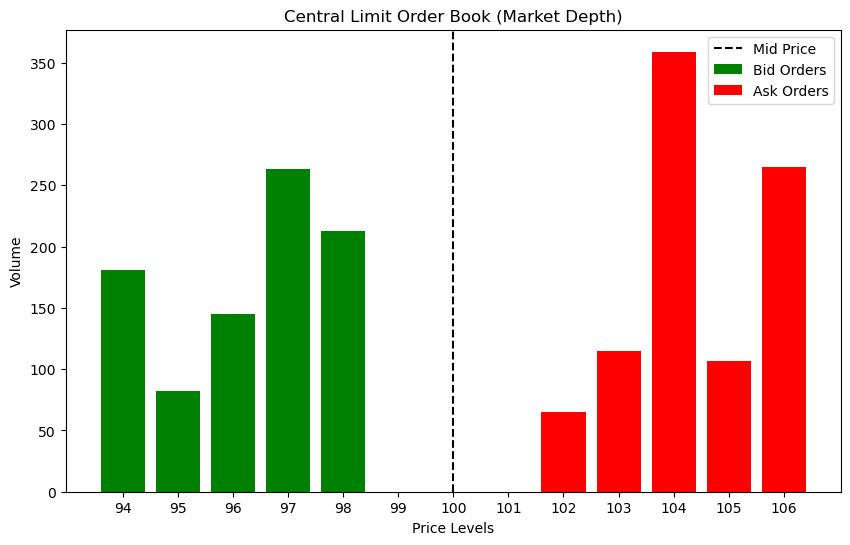

Calculated Market Metrics:
Best Bid Price: 98, Volume: 213
Best Ask Price: 102, Volume: 65
Mid-Price: 100.00
Spread: 4.00
Imbalance between best bid and ask: 0.53


In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Define bid and ask prices
bid_prices = np.array([94, 95, 96, 97, 98, 99])  # Bid price levels
ask_prices = np.array([101, 102, 103, 104, 105, 106])  # Ask price levels

# Randomize volumes for bids and asks
np.random.seed(45)  # For reproducibility
bid_volumes = np.random.randint(50, 400, size=len(bid_prices))  # Random volumes for bids
ask_volumes = np.random.randint(50, 400, size=len(ask_prices))  # Random volumes for asks

# Empty volumes for levels close to the mid-price (bid at 99 and ask at 101)
bid_volumes[5] = 0  # Bid close to mid (price 99)
ask_volumes[0] = 0  # Ask close to mid (price 101)

# Calculate the best bid and ask prices and their volumes
# Best bid: highest bid price with non-zero volume
nonzero_bid_indices = np.where(bid_volumes > 0)[0]
if len(nonzero_bid_indices) > 0:
    best_bid_price = bid_prices[nonzero_bid_indices].max()
    best_bid_index = np.where(bid_prices == best_bid_price)[0][0]
    best_bid_volume = bid_volumes[best_bid_index]
else:
    best_bid_price = None
    best_bid_volume = 0

# Best ask: lowest ask price with non-zero volume
nonzero_ask_indices = np.where(ask_volumes > 0)[0]
if len(nonzero_ask_indices) > 0:
    best_ask_price = ask_prices[nonzero_ask_indices].min()
    best_ask_index = np.where(ask_prices == best_ask_price)[0][0]
    best_ask_volume = ask_volumes[best_ask_index]
else:
    best_ask_price = None
    best_ask_volume = 0

# Calculate mid-price and spread
if best_bid_price is not None and best_ask_price is not None:
    mid_price = (best_bid_price + best_ask_price) / 2
    spread = best_ask_price - best_bid_price
else:
    mid_price = None
    spread = None

# Calculate imbalance between best bid and ask volumes
total_volume = best_bid_volume + best_ask_volume
if total_volume > 0:
    imbalance = (best_bid_volume - best_ask_volume) / total_volume
else:
    imbalance = None

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bid bars (leave a gap near the mid-price)
ax.bar(bid_prices, bid_volumes, color='green', align='center', label='Bid Orders')

# Plot ask bars (leave a gap near the mid-price)
ax.bar(ask_prices, ask_volumes, color='red', align='center', label='Ask Orders')

# Mid-price line
if mid_price is not None:
    ax.axvline(mid_price, color='black', linestyle='--', label=f'Mid Price')
else:
    ax.axvline(100, color='black', linestyle='--', label='Mid Price')

# Adding x-axis ticks for every integer price level from min to max price
all_price_levels = np.arange(min(bid_prices.min(), ask_prices.min()), max(bid_prices.max(), ask_prices.max()) + 1)
ax.set_xticks(all_price_levels)
ax.set_xticklabels(all_price_levels)

# Labels and title
ax.set_ylabel('Volume')
ax.set_xlabel('Price Levels')
ax.set_title('Central Limit Order Book (Market Depth)')
ax.legend()

# Show the plot
plt.show()

# Print the calculated values
print("Calculated Market Metrics:")
if best_bid_price is not None:
    print(f"Best Bid Price: {best_bid_price}, Volume: {best_bid_volume}")
else:
    print("No bids available.")

if best_ask_price is not None:
    print(f"Best Ask Price: {best_ask_price}, Volume: {best_ask_volume}")
else:
    print("No asks available.")

if mid_price is not None and spread is not None:
    print(f"Mid-Price: {mid_price:.2f}")
    print(f"Spread: {spread:.2f}")
else:
    print("Mid-Price and Spread are not available.")

if imbalance is not None:
    print(f"Imbalance between best bid and ask: {imbalance:.2f}")
else:
    print("Imbalance is not available due to zero total volume at best bid and ask.")


### Effect of a market order in the CLOB

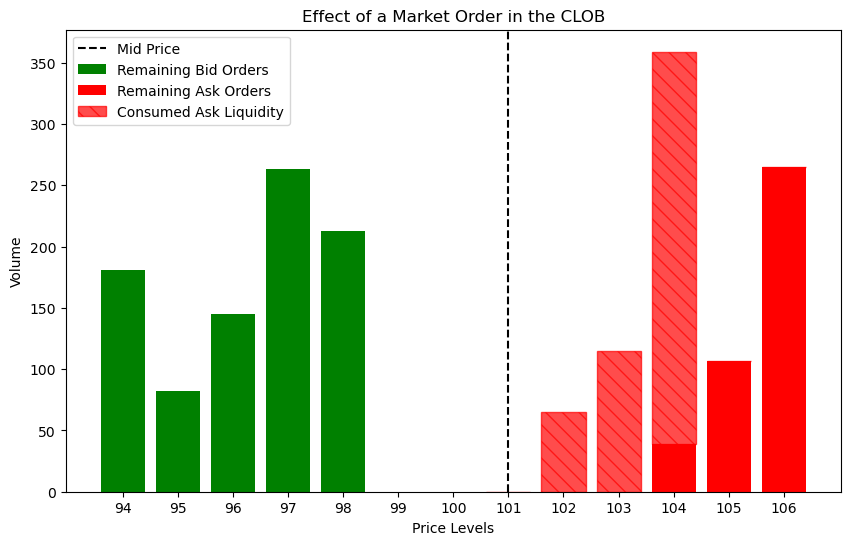

The average execution price for the market order is: 103.51
The new mid-price after the market order execution is: 101.00


In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Define bid and ask prices
bid_prices = np.array([94, 95, 96, 97, 98, 99])  # Bid price levels
ask_prices = np.array([101, 102, 103, 104, 105, 106])  # Ask price levels

# Randomize volumes for bids and asks
np.random.seed(45)  # For reproducibility
bid_volumes = np.random.randint(50, 400, size=len(bid_prices))  # Random volumes for bids
ask_volumes = np.random.randint(50, 400, size=len(ask_prices))  # Random volumes for asks

# Empty volumes for levels close to the mid-price (bid at 99 and ask at 101)
bid_volumes[5] = 0  # Bid close to mid
ask_volumes[0] = 0  # Ask close to mid

# Arrays to track consumed volumes (for visualization)
consumed_bid_volumes = np.zeros(len(bid_volumes))
consumed_ask_volumes = np.zeros(len(ask_volumes))

mid_price = 100  # Initial mid-price before market order execution

# Simulate market order input
market_order_size = 500  # For example, 500
market_order_side = "buy"  # For example, 'buy'

# Function to simulate the market order
def execute_market_order(order_size, order_side):
    global bid_volumes, ask_volumes, consumed_bid_volumes, consumed_ask_volumes
    executed_volume = 0
    executed_value = 0

    if order_side == 'buy':  # Market order to buy shares
        remaining_size = order_size
        for i in range(len(ask_prices)):
            if ask_volumes[i] > 0:
                tradable_volume = min(ask_volumes[i], remaining_size)
                executed_volume += tradable_volume
                executed_value += tradable_volume * ask_prices[i]
                consumed_ask_volumes[i] += tradable_volume  # Track consumed volume
                ask_volumes[i] -= tradable_volume
                remaining_size -= tradable_volume
                if remaining_size <= 0:
                    break
    elif order_side == 'sell':  # Market order to sell shares
        remaining_size = order_size
        for i in range(len(bid_prices)-1, -1, -1):  # Start from highest bid
            if bid_volumes[i] > 0:
                tradable_volume = min(bid_volumes[i], remaining_size)
                executed_volume += tradable_volume
                executed_value += tradable_volume * bid_prices[i]
                consumed_bid_volumes[i] += tradable_volume  # Track consumed volume
                bid_volumes[i] -= tradable_volume
                remaining_size -= tradable_volume
                if remaining_size <= 0:
                    break

    # Calculate the average execution price
    execution_price = executed_value / executed_volume if executed_volume > 0 else 0
    return execution_price

# Function to recalculate the mid-price based on the updated order book
def recalculate_mid_price():
    global bid_prices, bid_volumes, ask_prices, ask_volumes
    # Get the best bid price (highest bid price with non-zero volume)
    if np.any(bid_volumes > 0):
        best_bid = np.max(bid_prices[bid_volumes > 0])
    else:
        best_bid = np.nan  # No bids in the book

    # Get the best ask price (lowest ask price with non-zero volume)
    if np.any(ask_volumes > 0):
        best_ask = np.min(ask_prices[ask_volumes > 0])
    else:
        best_ask = np.nan  # No asks in the book

    # Recalculate mid-price
    if not np.isnan(best_bid) and not np.isnan(best_ask):
        new_mid_price = (best_bid + best_ask) / 2
    elif not np.isnan(best_bid):
        new_mid_price = best_bid  # Only bids are available
    elif not np.isnan(best_ask):
        new_mid_price = best_ask  # Only asks are available
    else:
        new_mid_price = np.nan  # No bids or asks in the book

    return new_mid_price

# Updated function to visualize the order book
def plot_order_book(order_side, mid_price):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot remaining bid orders in green
    ax.bar(bid_prices, bid_volumes, color='green', align='center', label='Remaining Bid Orders')

    # Plot remaining ask orders in red
    ax.bar(ask_prices, ask_volumes, color='red', align='center', label='Remaining Ask Orders')

    # Plot consumed liquidity based on the order side
    if order_side == 'buy':
        # Plot consumed ask liquidity on top with a hatch pattern
        if np.any(consumed_ask_volumes > 0):
            ax.bar(ask_prices, consumed_ask_volumes, bottom=ask_volumes, color='red', align='center',
                   label='Consumed Ask Liquidity', hatch='\\\\', edgecolor='red', alpha=0.7)
    elif order_side == 'sell':
        # Plot consumed bid liquidity on top with a hatch pattern
        if np.any(consumed_bid_volumes > 0):
            ax.bar(bid_prices, consumed_bid_volumes, bottom=bid_volumes, color='green', align='center',
                   label='Consumed Bid Liquidity', hatch='//', edgecolor='green', alpha=0.7)

    # Mid-price line
    if not np.isnan(mid_price):
        ax.axvline(mid_price, color='black', linestyle='--', label=f'Mid Price')
    else:
        ax.axvline(mid_price, color='black', linestyle='--', label='Mid Price Unavailable')

    # Adding x-axis ticks for every integer price level from min to max price
    all_price_levels = np.arange(min(bid_prices.min(), ask_prices.min()), max(bid_prices.max(), ask_prices.max()) + 1)
    ax.set_xticks(all_price_levels)
    ax.set_xticklabels(all_price_levels)

    # Labels and title
    ax.set_ylabel('Volume')
    ax.set_xlabel('Price Levels')
    ax.set_title('Effect of a Market Order in the CLOB')

    # Custom legend to include only relevant labels
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Filter the legend labels based on the order side
    if order_side == 'buy':
        by_label.pop('Consumed Bid Liquidity', None)
    elif order_side == 'sell':
        by_label.pop('Consumed Ask Liquidity', None)

    ax.legend(by_label.values(), by_label.keys())

    plt.show()

# Execute the market order and update the order book
execution_price = execute_market_order(market_order_size, market_order_side)

# Recalculate the mid-price based on the updated order book
new_mid_price = recalculate_mid_price()

# Plot the updated order book with the new mid-price
plot_order_book(market_order_side, new_mid_price)

# Output the execution price and the new mid-price
print(f"The average execution price for the market order is: {execution_price:.2f}")
if not np.isnan(new_mid_price):
    print(f"The new mid-price after the market order execution is: {new_mid_price:.2f}")
else:
    print("The mid-price is unavailable due to no bids or asks in the book.")


### Effect of a limit order in the CLOB

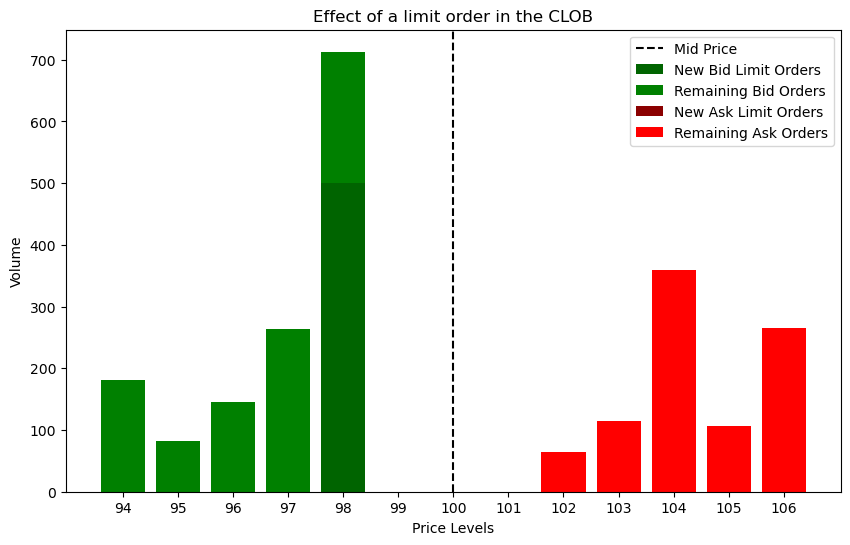

The average execution price for the limit order is: 0.00
Remaining order of 500 shares sits in the book at the limit price of 98.
The new mid-price after the limit order execution is: 100.00


In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Define bid and ask prices
bid_prices = np.array([94, 95, 96, 97, 98, 99])  # Bid price levels
ask_prices = np.array([101, 102, 103, 104, 105, 106])  # Ask price levels

# Randomize volumes for bids and asks
np.random.seed(45)  # For reproducibility
bid_volumes = np.random.randint(50, 400, size=len(bid_prices))  # Random volumes for bids
ask_volumes = np.random.randint(50, 400, size=len(ask_prices))  # Random volumes for asks

# Empty volumes for levels close to the mid-price (bid at 99 and ask at 101)
bid_volumes[5] = 0  # Bid close to mid
ask_volumes[0] = 0  # Ask close to mid

# Arrays to track consumed volumes and new limit orders for visualization
consumed_bid_volumes = np.zeros(len(bid_volumes))
consumed_ask_volumes = np.zeros(len(ask_volumes))
new_bid_volumes = np.zeros(len(bid_volumes))
new_ask_volumes = np.zeros(len(ask_volumes))

mid_price = 100  # Initial mid-price before limit order execution

# Function to simulate an aggressive limit order
def execute_limit_order(order_price, order_volume, order_side):
    global bid_volumes, ask_volumes, consumed_bid_volumes, consumed_ask_volumes, new_bid_volumes, new_ask_volumes

    executed_volume = 0
    executed_value = 0
    remaining_volume = order_volume

    if order_side == 'buy':
        best_ask = min(ask_prices[ask_volumes > 0]) if np.any(ask_volumes > 0) else np.inf
        if order_price < best_ask:
            # The buy limit order remains unexecuted and gets added to the book below existing orders
            insert_order_into_book(order_price, remaining_volume, 'buy', priority='low')
            return 0, remaining_volume  # No execution, entire order sits in the book
        else:
            # The buy limit order consumes liquidity like a market order up to the limit price
            for i in range(len(ask_prices)):
                if ask_prices[i] <= order_price and ask_volumes[i] > 0:
                    if ask_volumes[i] >= remaining_volume:
                        executed_volume += remaining_volume
                        executed_value += remaining_volume * ask_prices[i]
                        consumed_ask_volumes[i] += remaining_volume  # Track consumed volume
                        ask_volumes[i] -= remaining_volume
                        remaining_volume = 0
                        break
                    else:
                        executed_volume += ask_volumes[i]
                        executed_value += ask_volumes[i] * ask_prices[i]
                        consumed_ask_volumes[i] += ask_volumes[i]  # Track consumed volume
                        remaining_volume -= ask_volumes[i]
                        ask_volumes[i] = 0
            # Any remaining volume sits in the book at the limit price
            if remaining_volume > 0:
                insert_order_into_book(order_price, remaining_volume, 'buy', priority='low')

    elif order_side == 'sell':
        best_bid = max(bid_prices[bid_volumes > 0]) if np.any(bid_volumes > 0) else -np.inf
        if order_price > best_bid:
            # The sell limit order remains unexecuted and gets added to the book above existing orders
            insert_order_into_book(order_price, remaining_volume, 'sell', priority='low')
            return 0, remaining_volume  # No execution, entire order sits in the book
        else:
            # The sell limit order consumes liquidity like a market order up to the limit price
            for i in range(len(bid_prices)-1, -1, -1):  # Start from highest bid
                if bid_prices[i] >= order_price and bid_volumes[i] > 0:
                    if bid_volumes[i] >= remaining_volume:
                        executed_volume += remaining_volume
                        executed_value += remaining_volume * bid_prices[i]
                        consumed_bid_volumes[i] += remaining_volume  # Track consumed volume
                        bid_volumes[i] -= remaining_volume
                        remaining_volume = 0
                        break
                    else:
                        executed_volume += bid_volumes[i]
                        executed_value += bid_volumes[i] * bid_prices[i]
                        consumed_bid_volumes[i] += bid_volumes[i]  # Track consumed volume
                        remaining_volume -= bid_volumes[i]
                        bid_volumes[i] = 0
            # Any remaining volume sits in the book at the limit price
            if remaining_volume > 0:
                insert_order_into_book(order_price, remaining_volume, 'sell', priority='low')

    # Calculate the average execution price
    execution_price = executed_value / executed_volume if executed_volume > 0 else 0
    return execution_price, remaining_volume

# Function to insert the remaining limit order into the order book
def insert_order_into_book(order_price, remaining_volume, order_side, priority):
    global bid_prices, ask_prices, bid_volumes, ask_volumes, new_bid_volumes, new_ask_volumes, consumed_bid_volumes, consumed_ask_volumes

    if order_side == 'buy':  # Remaining buy order stays as a bid
        # Check if the price level exists
        if order_price in bid_prices:
            index = np.where(bid_prices == order_price)[0][0]
            if priority == 'low':
                new_bid_volumes[index] += remaining_volume  # Lower priority new limit order
            else:
                bid_volumes[index] += remaining_volume  # Higher priority remaining volume
        else:
            # Insert a new price level
            bid_prices = np.append(bid_prices, order_price)
            bid_volumes = np.append(bid_volumes, 0 if priority == 'low' else remaining_volume)
            new_bid_volumes = np.append(new_bid_volumes, remaining_volume if priority == 'low' else 0)
            consumed_bid_volumes = np.append(consumed_bid_volumes, 0)
            # Sort by price
            sort_indices = np.argsort(bid_prices)
            bid_prices = bid_prices[sort_indices]
            bid_volumes = bid_volumes[sort_indices]
            new_bid_volumes = new_bid_volumes[sort_indices]
            consumed_bid_volumes = consumed_bid_volumes[sort_indices]

    elif order_side == 'sell':  # Remaining sell order stays as an ask
        # Check if the price level exists
        if order_price in ask_prices:
            index = np.where(ask_prices == order_price)[0][0]
            if priority == 'low':
                new_ask_volumes[index] += remaining_volume  # Lower priority new limit order
            else:
                ask_volumes[index] += remaining_volume  # Higher priority remaining volume
        else:
            # Insert a new price level
            ask_prices = np.append(ask_prices, order_price)
            ask_volumes = np.append(ask_volumes, 0 if priority == 'low' else remaining_volume)
            new_ask_volumes = np.append(new_ask_volumes, remaining_volume if priority == 'low' else 0)
            consumed_ask_volumes = np.append(consumed_ask_volumes, 0)
            # Sort by price
            sort_indices = np.argsort(ask_prices)
            ask_prices = ask_prices[sort_indices]
            ask_volumes = ask_volumes[sort_indices]
            new_ask_volumes = new_ask_volumes[sort_indices]
            consumed_ask_volumes = consumed_ask_volumes[sort_indices]

# Function to recalculate the mid-price based on the updated order book
def recalculate_mid_price():
    global bid_prices, bid_volumes, ask_prices, ask_volumes, new_bid_volumes, new_ask_volumes
    # Calculate total bid volumes at each price level
    total_bid_volumes = bid_volumes + new_bid_volumes
    # Get the best bid price (highest bid price with non-zero volume)
    if np.any(total_bid_volumes > 0):
        best_bid = np.max(bid_prices[total_bid_volumes > 0])
    else:
        best_bid = np.nan  # No bids in the book

    # Calculate total ask volumes at each price level
    total_ask_volumes = ask_volumes + new_ask_volumes
    # Get the best ask price (lowest ask price with non-zero volume)
    if np.any(total_ask_volumes > 0):
        best_ask = np.min(ask_prices[total_ask_volumes > 0])
    else:
        best_ask = np.nan  # No asks in the book

    # Recalculate mid-price
    if not np.isnan(best_bid) and not np.isnan(best_ask):
        new_mid_price = (best_bid + best_ask) / 2
    elif not np.isnan(best_bid):
        new_mid_price = best_bid  # Only bids are available
    elif not np.isnan(best_ask):
        new_mid_price = best_ask  # Only asks are available
    else:
        new_mid_price = np.nan  # No bids or asks in the book

    return new_mid_price

# Updated function to visualize the order book
def plot_order_book(order_side, mid_price):
    fig, ax = plt.subplots(figsize=(10, 6))

    # For bids
    # Total volumes for stacking
    bid_total_volumes = new_bid_volumes + bid_volumes + consumed_bid_volumes

    # Plot new bid limit orders at the bottom
    ax.bar(bid_prices, new_bid_volumes, color='darkgreen', align='center',
           label='New Bid Limit Orders')

    # Plot existing bid orders on top of new limit orders
    bid_existing_bottom = new_bid_volumes
    ax.bar(bid_prices, bid_volumes, bottom=bid_existing_bottom, color='green', align='center',
           label='Remaining Bid Orders')

    # Plot consumed bid liquidity on top of existing orders
    bid_consumed_bottom = bid_existing_bottom + bid_volumes
    if np.any(consumed_bid_volumes > 0):
        ax.bar(bid_prices, consumed_bid_volumes, bottom=bid_consumed_bottom, color='green', align='center',
               label='Consumed Liquidity', hatch='//', edgecolor='green', alpha=0.7)

    # For asks
    # Total volumes for stacking
    ask_total_volumes = new_ask_volumes + ask_volumes + consumed_ask_volumes

    # Plot new ask limit orders at the bottom
    ax.bar(ask_prices, new_ask_volumes, color='darkred', align='center',
           label='New Ask Limit Orders')

    # Plot existing ask orders on top of new limit orders
    ask_existing_bottom = new_ask_volumes
    ax.bar(ask_prices, ask_volumes, bottom=ask_existing_bottom, color='red', align='center',
           label='Remaining Ask Orders')

    # Plot consumed ask liquidity on top of existing orders
    ask_consumed_bottom = ask_existing_bottom + ask_volumes
    if np.any(consumed_ask_volumes > 0):
        ax.bar(ask_prices, consumed_ask_volumes, bottom=ask_consumed_bottom, color='red', align='center',
               label='Consumed Liquidity', hatch='\\\\', edgecolor='red', alpha=0.7)

    # Mid-price line
    if not np.isnan(mid_price):
        ax.axvline(mid_price, color='black', linestyle='--', label=f'Mid Price')
    else:
        ax.axvline(mid_price, color='black', linestyle='--', label='Mid Price Unavailable')

    # Adding x-axis ticks
    all_price_levels = np.arange(min(bid_prices.min(), ask_prices.min()), max(bid_prices.max(), ask_prices.max()) + 1)
    ax.set_xticks(all_price_levels)
    ax.set_xticklabels(all_price_levels)

    # Labels and title
    ax.set_ylabel('Volume')
    ax.set_xlabel('Price Levels')
    ax.set_title('Effect of a limit order in the CLOB')

    # Custom legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    plt.show()

# Example of a buy limit order at price 102 for 700 shares
limit_order_price = 98
limit_order_volume = 500
limit_order_side = 'buy'

# Execute the limit order
execution_price, remaining_volume = execute_limit_order(limit_order_price, limit_order_volume, limit_order_side)

# Recalculate the mid-price based on the updated order book
new_mid_price = recalculate_mid_price()

# Plot the updated order book with the new mid-price
plot_order_book(limit_order_side, new_mid_price)

# Output the execution price and remaining order details
print(f"The average execution price for the limit order is: {execution_price:.2f}")
if remaining_volume > 0:
    print(f"Remaining order of {remaining_volume} shares sits in the book at the limit price of {limit_order_price}.")
if not np.isnan(new_mid_price):
    print(f"The new mid-price after the limit order execution is: {new_mid_price:.2f}")
else:
    print("The mid-price is unavailable due to no bids or asks in the book.")


## The RfQ process in MD2C platforms

### Visualization of RfQ process

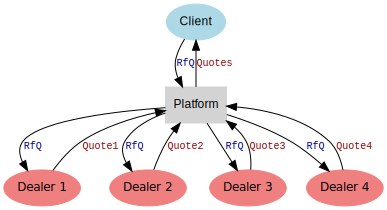

In [45]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='RfQ Protocol')

# Graph-level attributes for font
dot.attr(fontname='Helvetica', fontsize='12')

# Add nodes with custom fonts
dot.node('Client', 'Client', shape='ellipse', style='filled', color='lightblue', fontname='Helvetica', fontsize='12')
dot.node('Platform', 'Platform', shape='box', style='filled', color='lightgrey', fontname='Helvetica', fontsize='12')

# Add dealers with custom fonts
for i in range(1, 5):  # Adjust the number of dealers as needed
    dot.node(f'Dealer{i}', f'Dealer {i}', shape='ellipse', style='filled', color='lightcoral', fontname='Helvetica-Italic', fontsize='12')

# Add edges with custom fonts
dot.edge('Client', 'Platform', label='RfQ', fontname='Courier', fontsize='10', fontcolor='darkblue')
for i in range(1, 5):
    dot.edge('Platform', f'Dealer{i}', label=f'RfQ', fontname='Courier', fontsize='10', fontcolor='darkblue')
    dot.edge(f'Dealer{i}', 'Platform', label=f'Quote{i}', fontname='Courier', fontsize='10', fontcolor='darkred')
dot.edge('Platform', 'Client', label='Quotes', fontname='Courier', fontsize='10', fontcolor='darkred')

# Render and display the graph
# dot.render("/Users/javier/Documents/aaat/markdown/rfq", format='png', cleanup=True)
dot